In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
    # for filename in filenames:
        # print(dirname)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import re
def count_folders(parent_folder):
    # Initialize a counter for the directories
    folder_count = 0
    
    # os.listdir() returns a list of entries in the directory given by 'parent_folder'
    # os.path.join() constructs the full path to the entry
    # os.path.isdir() checks whether the given path is a directory
    for entry in os.listdir(parent_folder):
        if os.path.isdir(os.path.join(parent_folder, entry)):
            if entry.strip().startswith('P'):
                print(f"{entry} is in {parent_folder}")
            folder_count += 1

    return folder_count

In [3]:
# Example usage:
listpath = ['/kaggle/input/100-bird-species/test', '/kaggle/input/100-bird-species/train', '/kaggle/input/100-bird-species/valid']
#for parent_folder_path in listpath:
#    print(f"Number of folders in '{parent_folder_path}': {count_folders(parent_folder_path)}")

In [4]:
import os

def rename_folder(old_name, new_name):
    try:
        os.rename(old_name, new_name)
        print(f"Folder renamed from {old_name} to {new_name}")
    except OSError as e:
        print(f"Error: {e}")


In [5]:
from fastai.vision.all import *

In [6]:
birds = DataBlock(
                    blocks=(ImageBlock, CategoryBlock),
                    get_items=get_image_files,
                    splitter=RandomSplitter(valid_pct=0.2, seed=42),
                    get_y=parent_label,
                    item_tfms=Resize(128)
)

In [7]:
from pathlib import Path

In [8]:
path = Path("/kaggle/input/100-bird-species")

In [9]:
# birds.summary(path/"train") # check if there is a problem

In [10]:
dls = birds.dataloaders(path/'train')

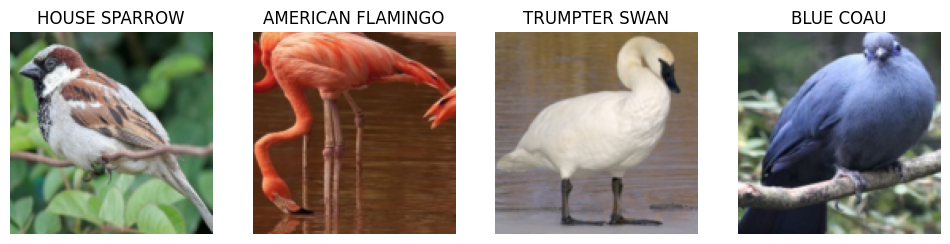

In [11]:
dls.valid.show_batch(max_n=4, nrows=1)

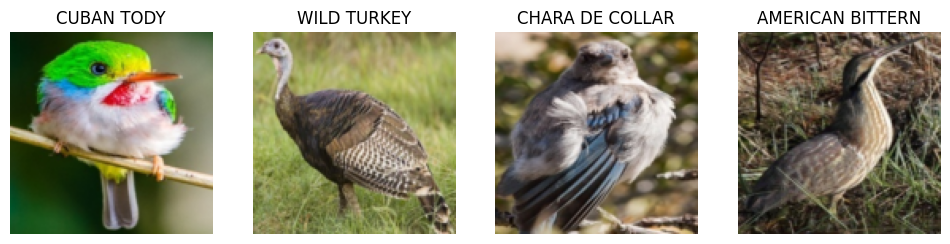

In [12]:
dls.train.show_batch(max_n=4, nrows=1)

In [13]:
birds = birds.new(
                    item_tfms=RandomResizedCrop(224, min_scale=0.5),
                    batch_tfms=aug_transforms())
dls = birds.dataloaders(path/'train')

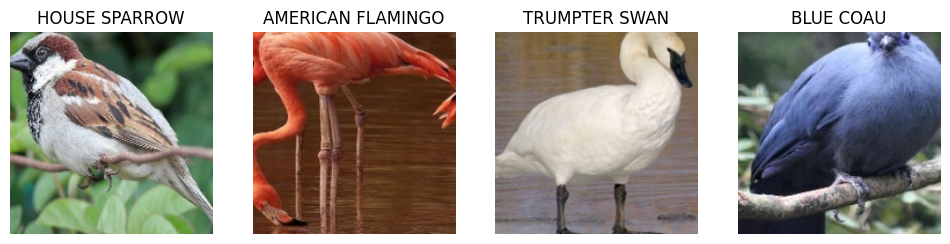

In [14]:
dls.valid.show_batch(max_n=4, nrows=1)

In [15]:
# dls = ImageDataLoaders.from_folder(path, item_tfms=Resize(224))

In [16]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)

/opt/conda/lib/python3.10/site-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 127MB/s]


In [17]:
learn.fine_tune(4)

epoch,train_loss,valid_loss,accuracy,time
0,1.976924,1.036490,0.748745,03:13


epoch,train_loss,valid_loss,accuracy,time
0,1.165551,0.565105,0.860105,02:49
1,0.866328,0.395797,0.899569,02:49
2,0.584446,0.302852,0.924972,02:49
3,0.446633,0.278137,0.930821,02:50


In [18]:
learn.export()

In [19]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [20]:
learn_inf = load_learner(path/'export.pkl')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
# learn = cnn_learner(dls, resnet18, metrics=error_rate)
# learn.fine_tune(4)

In [ ]:
interp.plot_top_losses(5, nrows=1)

In [ ]:
learn_inf.dls.vocab

In [ ]:
cleaner = ImageClassifierCleaner(learn_inf)
cleaner

In [ ]:
uploader = widgets.FileUpload()
uploader

In [ ]:
img = PILImage.create(uploader.data[0])
learn_inf.predict(img)